# Fitting Function Models
A functional model allows for the creation of data, fitting of experimental data, plotting and symbolic manipulation of mathematical models based on functions. This includes symbolic intergration, differentiation and algebra. This module requires sympy and numpy to work. 

In [1]:
from univariate_tools import *
import matplotlib.pyplot as plt
import random
from ipywidgets import *

## Creation of a new functional model
1. Pass parameters as a list or a string separated by spaces
2. Pass variables as a list or a string seperated by spaces
3. Pass an equation that sympy understands 

In [2]:
line=FunctionalModel(parameters=["m","b"],variables="x",equation="m*x+b")

In [3]:
# now line can be point on any line
line(m=1.2,b=3,x=.1)

3.12

In [4]:
# or you can set the parameters
line.set_parameters(m=3,b=1)
# now any x_list you pass it as an np.array can be calculated
line(np.array([-1,0,1]))

array([-2,  1,  4])

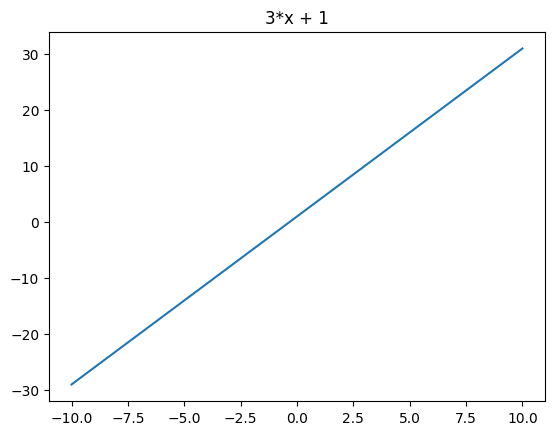

In [5]:
%matplotlib inline
# This can be used to plot functions
x_data=np.linspace(-10,10,1000)
plt.plot(x_data,line(x_data))
plt.title(str(line))
plt.show()

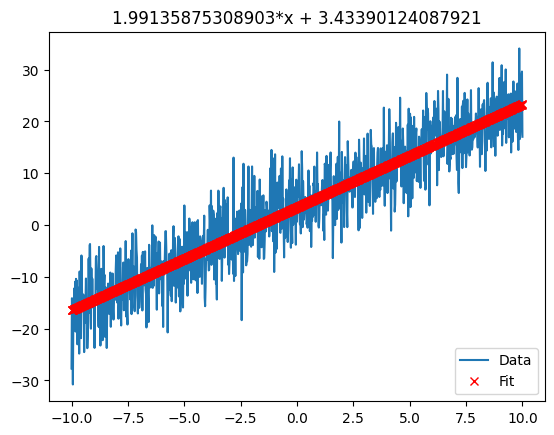

In [6]:
# if you have a data set it can actually fit the data using the model
x_data=np.linspace(-10,10,1000)
# make a line with a little noise
y_data=np.array([2*x + 3.5 +random.gauss(0,5) for x in x_data])
# now to fit we use line.fit_data
line.fit_data(x_data,y_data)
plt.plot(x_data,y_data,label="Data")
plt.plot(x_data,line(x_data),"rx",label="Fit")
plt.title(str(line))
plt.legend(loc=4)
plt.show()

In [7]:
# this works with even more complicated functions
gaussian=FunctionalModel(parameters="alpha x0 delta",variables="x",equation="alpha*exp(-1*(x-x0)^2/(2*delta**2))")

In [8]:
print(gaussian)

alpha*exp(-(x - x0)**2/(2*delta**2))


Text(0.5, 1.0, '$\\alpha e^{- \\frac{\\left(x - x_{0}\\right)^{2}}{2 \\delta^{2}}}$')

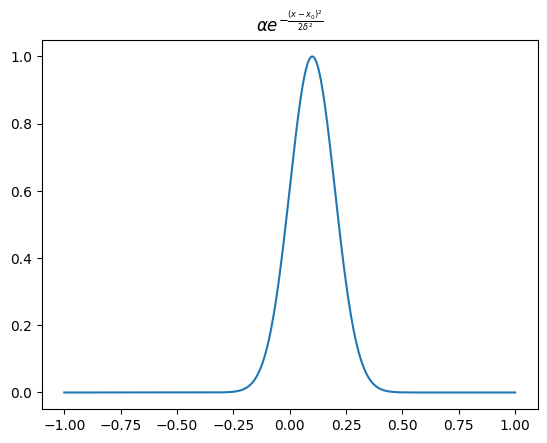

In [9]:
# it also has a latex form
x_data=np.linspace(-1,1,1000)
plt.plot(x_data,gaussian(alpha=1,x0=.1,delta=.1,x=x_data))
plt.title("${0}$".format(gaussian.to_latex()))

Text(0.5, 1.0, '$\\alpha e^{- \\frac{\\left(x - x_{0}\\right)^{2}}{2 \\delta^{2}}} + b + m x$')

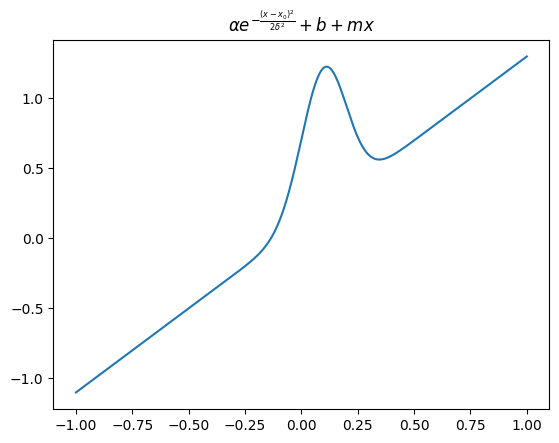

In [10]:
# Now you have the ability to add functions 
gauss_line=line+gaussian
x_data=np.linspace(-1,1,1000)
plt.plot(x_data,gauss_line(alpha=1,x0=.1,delta=.1,m=1.2,b=.1,x=x_data))
plt.title("${0}$".format(gauss_line.to_latex()))

In [11]:
# we can take a derivative
print(gauss_line.d())
# or a higher order one
print(gauss_line.d(order=4))
# or with respect to a parameter
print(gauss_line.d(respect_to="delta"))

-alpha*(2*x - 2*x0)*exp(-(x - x0)**2/(2*delta**2))/(2*delta**2) + m
3*alpha*exp(-(x - x0)**2/(2*delta**2))/delta**4 - alpha*(2*x - 2*x0)**2*exp(-(x - x0)**2/(2*delta**2))/delta**6 - alpha*(2*x - 2*x0)*(8*x - 8*x0)*exp(-(x - x0)**2/(2*delta**2))/(8*delta**6) + alpha*(2*x - 2*x0)**4*exp(-(x - x0)**2/(2*delta**2))/(16*delta**8)
alpha*(x - x0)**2*exp(-(x - x0)**2/(2*delta**2))/delta**3


Text(0.5, 1.0, '$\\frac{\\alpha \\left(2 x - 2 x_{0}\\right) e^{- \\frac{\\left(x - x_{0}\\right)^{2}}{2 \\delta^{2}}}}{2 \\delta^{4}} + \\frac{\\alpha \\left(8 x - 8 x_{0}\\right) e^{- \\frac{\\left(x - x_{0}\\right)^{2}}{2 \\delta^{2}}}}{4 \\delta^{4}} - \\frac{\\alpha \\left(2 x - 2 x_{0}\\right)^{3} e^{- \\frac{\\left(x - x_{0}\\right)^{2}}{2 \\delta^{2}}}}{8 \\delta^{6}}$')

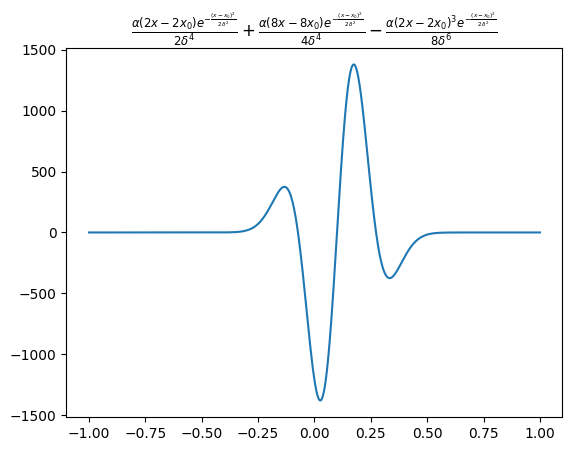

In [12]:
# we could even plot/fit using the derivative of any order
gauss_line=line+gaussian
x_data=np.linspace(-1,1,1000)
gauss_line_d3=gauss_line.d(order=3)
plt.plot(x_data,gauss_line_d3(alpha=1,x0=.1,delta=.1,m=1.2,b=.1,x=x_data))
plt.title("${0}$".format(gauss_line_d3.to_latex()))

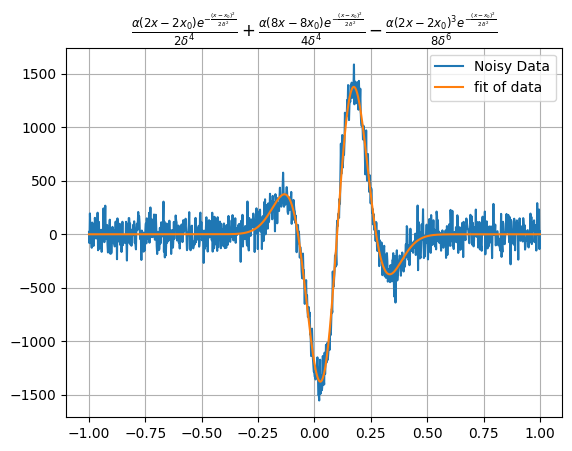

In [13]:
# or create data and fit it
gauss_line=line+gaussian
x_data=np.linspace(-1,1,1000)
output_noise=np.random.normal(0,100,len(x_data))
gauss_line_d3=gauss_line.d(order=3)
y_data=gauss_line_d3(alpha=1,x0=.1,delta=.1,m=1.2,b=.1,x=x_data)+output_noise
plt.plot(x_data,y_data,label="Noisy Data")
plt.title("${0}$".format(gauss_line_d3.to_latex()))
gauss_line_d3.fit_data(x_data,
                           y_data,
                           **{"initial_guess":{"alpha":1,"x0":.1,"delta":.1,"m":1.2,"b":.1}})
plt.plot(x_data,gauss_line_d3(x_data),label="fit of data")
plt.legend()
plt.grid()


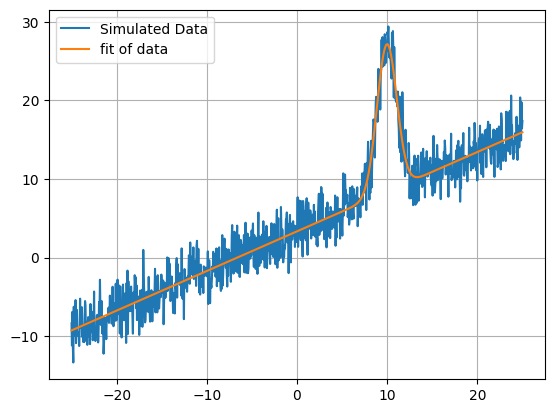

In [14]:
# now we can create a DataSimulator object to change the output noise on any FunctionalModel and fit it
model=line+gaussian
model_2=line+gaussian
model.set_parameters(m=.5,b=3.4,delta=1,x0=10.,alpha=20)
simulated_data=DataSimulator(model=model,output_noise_type="normal",output_noise_width=2.,output_noise_center=0.)
simulated_data.set_x(-25,25,1000)
plt.plot(simulated_data.x,simulated_data.data,label="Simulated Data")
model_2.fit_data(simulated_data.x,simulated_data.data,**{"initial_guess":model.parameter_values})
plt.plot(simulated_data.x,model_2(simulated_data.x),label="fit of data")
plt.legend()
plt.grid()

In [15]:
# now we can create an interactive plot
# By passing a keyword set of parameters we can change which parameters that we interact with
def plot_fit(**options):
    defaults= {"output_noise_type":"normal",
              "output_noise_width":2,
              "output_noise_center":0,
              "m":.5,
              "b":3.4,
              "delta":1,
              "x0":10,
              "alpha":20,
              "x_min":-25,
              "x_max":25,
              "number_points":1000}
    fit_options={}
    for key,value in defaults.items():
        fit_options[key]=value
    for key,value in options.items():
        fit_options[key]=value
    line=FunctionalModel(parameters=["m","b"],variables="x",equation="m*x+b")
    gaussian=FunctionalModel(parameters="alpha x0 delta",variables="x",equation="alpha*exp(-1*(x-x0)^2/(2*delta**2))")
    model=line+gaussian
    model_2=line+gaussian
    model.set_parameters(m=fit_options["m"],b=fit_options["b"],
                         delta=fit_options["delta"],x0=fit_options["x0"],alpha=fit_options["alpha"])
    simulated_data=DataSimulator(model=model,output_noise_type=fit_options["output_noise_type"],
                                 output_noise_width=fit_options["output_noise_width"],
                                 output_noise_center=fit_options["output_noise_center"])
    simulated_data.set_x(fit_options["x_min"],fit_options["x_max"],fit_options["number_points"])
    model_2.fit_data(simulated_data.x,simulated_data.data,**{"initial_guess":model.parameter_values})
    parameter_text="${0}$\n".format(sympy.latex(model_2.equation))
    for key,value in model_2.parameter_values.items():
        parameter_text=parameter_text+"{0} = {1:3.2g} \n".format(key,value)
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3)
    ax0.plot(simulated_data.x,simulated_data.data,label="Data")
    ax0.plot(simulated_data.x,model_2(simulated_data.x),"ro",label="Fit")
    ax0.legend()
    ax1.text(fit_options["x_max"]+7,
             .1,
             parameter_text,
             fontsize=12)
    residuals=simulated_data.data-model_2(simulated_data.x)
    ax1.plot(simulated_data.x,residuals)
    ax2.hist(residuals)
    plt.show()

    

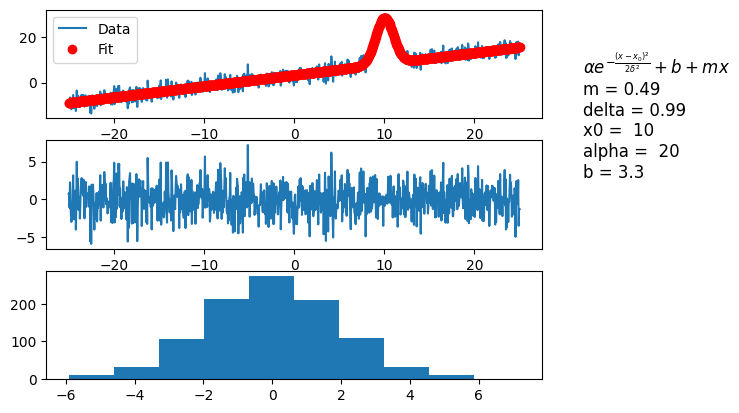

In [16]:
defaults= {"output_noise_type":"normal",
              "output_noise_width":2,
              "output_noise_center":0,
              "m":.5,
              "b":3.4,
              "delta":1,
              "x0":10,
              "alpha":20,
              "x_min":-25,
              "x_max":25,
              "number_points":1000}


plot_fit(**defaults)

# Use case of electronic circuits
We can build electronic circuit models
<br/>
$Z_{L}=i 2 \pi f L $ <br/>
$Z_{C}=\frac{- i }{2 \pi f C} $ <br/>
$Z_R=R$

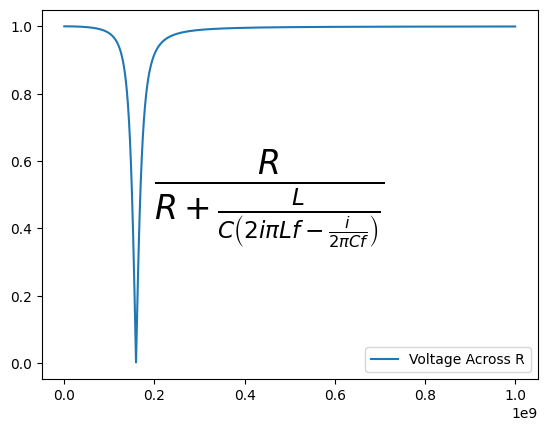

In [17]:
# We can use these models for simple electronic circuits
Zc=FunctionalModel(variables="f",parameters="C",equation="-1*I/(2*pi*f*C)")
Zl=FunctionalModel(variables="f",parameters="L",equation="I*(2*pi*f*L)")
Zr=FunctionalModel(variables="f",parameters="R",equation="R")
# now for frequencies
frequency=np.linspace(0.1*10**3,1*10**9,10000)

z_total=Zc**-1+Zl**-1+Zr**-1
# a RLC circuit
z_total=Zr+(Zc*Zl)/(Zc+Zl)
# voltage across the resistor
Vr=Zr/z_total

# plot of voltage across a resistor
Vr.set_parameters(C=10**(-10),L=10**-8,R=complex(50,0))
plt.plot(frequency,abs(Vr(frequency)),label="Voltage Across R")
plt.text(2*10**8,.5,"${0}$".format(sympy.latex(Vr.equation)),fontsize=34)
plt.legend()

<lambdifygenerated-115>:2: RuntimeWarning: divide by zero encountered in divide
  return 50.0/(50.0 + 100.0/(2.0e-8*1j*pi*f - 5000000000.0*1j/(pi*f)))
<lambdifygenerated-115>:2: RuntimeWarning: invalid value encountered in divide
  return 50.0/(50.0 + 100.0/(2.0e-8*1j*pi*f - 5000000000.0*1j/(pi*f)))
c:\Users\sandersa\.conda\envs\univariate_tools\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\sandersa\.conda\envs\univariate_tools\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


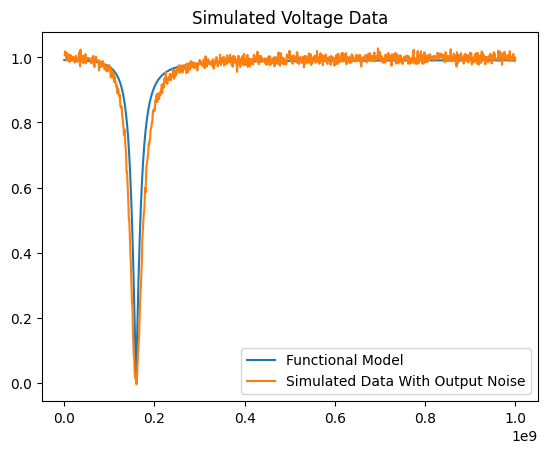

In [18]:
# again we could create a simulated data set with output noise
Vr_simulated_data=DataSimulator(model=Vr,
                                output_noise_type="normal",
                                output_noise_center=0,
                                output_noise_width=.01)
plt.plot(frequency,abs(Vr_simulated_data(frequency)),label="Functional Model")
Vr_simulated_data.set_x(0,10**9,1000)
plt.plot(Vr_simulated_data.x,Vr_simulated_data.data,label="Simulated Data With Output Noise")
plt.title("Simulated Voltage Data")
plt.legend(loc=4)